# Inicio

In [1]:
import pandas as pd

In [2]:
df_poblacion = pd.read_csv("Dia_1/Data/state-population.csv", sep=",")

df_areas = pd.read_csv("Dia_1/Data/state-areas.csv", sep=",")

df_ab = pd.read_csv("Dia_1/Data/state-abbrevs.csv", sep=",")



df_poblacion.rename(columns={"state/region":"state_region"}, inplace=True)

df_areas.rename(columns={"area (sq. mi)":"area"}, inplace=True)



df = pd.merge(df_poblacion, df_ab, left_on = "state_region", right_on = "abbreviation")

df = pd.merge(df, df_areas, on = "state")

del(df["abbreviation"])

df.head()

,state_region,ages,year,population,state,area
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_region  2448 non-null   object 
 1   ages          2448 non-null   object 
 2   year          2448 non-null   int64  
 3   population    2448 non-null   float64
 4   state         2448 non-null   object 
 5   area          2448 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 114.9+ KB


<Axes: >

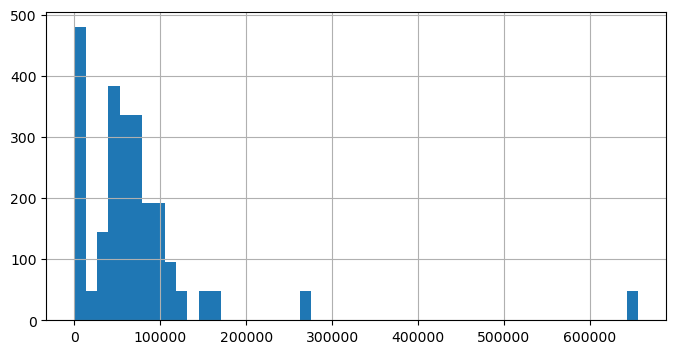

In [4]:
df["area"].hist(bins=50, figsize=(8,4))

In [5]:
df[df["state_region"]=="USA"]

,state_region,ages,year,population,state,area


In [6]:
df["population"] = df["population"].astype(int)

In [7]:
df.query("area>600000")["state"].unique()

array(['Alaska'], dtype=object)

In [8]:
df.query("area<10000")["state"].unique()

array(['Connecticut', 'Delaware', 'District of Columbia', 'New Hampshire',
       'New Jersey', 'Rhode Island', 'Vermont'], dtype=object)

In [9]:
df.sort_values("area").head()

,state_region,ages,year,population,state,area
387,DC,total,2011,619624,District of Columbia,68
407,DC,under18,2001,114625,District of Columbia,68
406,DC,total,2001,574504,District of Columbia,68
405,DC,under18,2004,109756,District of Columbia,68
404,DC,total,2004,567754,District of Columbia,68


In [10]:
a = df.set_index("state_region")

a.reset_index()

,state_region,ages,year,population,state,area
0,AL,under18,2012,1117489,Alabama,52423
1,AL,total,2012,4817528,Alabama,52423
2,AL,under18,2010,1130966,Alabama,52423
3,AL,total,2010,4785570,Alabama,52423
4,AL,under18,2011,1125763,Alabama,52423
...,...,...,...,...,...,...
2443,WY,under18,1993,137458,Wyoming,97818
2444,WY,total,1991,459260,Wyoming,97818
2445,WY,under18,1991,136720,Wyoming,97818
2446,WY,under18,1990,136078,Wyoming,97818


In [11]:
df["state_region"].duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
2443     True
2444     True
2445     True
2446     True
2447     True
Name: state_region, Length: 2448, dtype: bool

In [12]:
df[df["state_region"].duplicated()==False].head()

,state_region,ages,year,population,state,area
0,AL,under18,2012,1117489,Alabama,52423
48,AK,total,1990,553290,Alaska,656425
96,AZ,under18,2012,1617149,Arizona,114006
144,AR,under18,1990,620933,Arkansas,53182
192,CA,under18,2012,9209007,California,163707


In [13]:
df.drop_duplicates(subset=["state_region"]).head()

,state_region,ages,year,population,state,area
0,AL,under18,2012,1117489,Alabama,52423
48,AK,total,1990,553290,Alaska,656425
96,AZ,under18,2012,1617149,Arizona,114006
144,AR,under18,1990,620933,Arkansas,53182
192,CA,under18,2012,9209007,California,163707


In [14]:
df["pop_area"] = df["population"] / df["area"]
df.head()

,state_region,ages,year,population,state,area,pop_area
0,AL,under18,2012,1117489,Alabama,52423,21.316769
1,AL,total,2012,4817528,Alabama,52423,91.897221
2,AL,under18,2010,1130966,Alabama,52423,21.573851
3,AL,total,2010,4785570,Alabama,52423,91.287603
4,AL,under18,2011,1125763,Alabama,52423,21.474601


In [15]:
df[(df["year"] == 2013) & (df["state_region"] == "AL")]

,state_region,ages,year,population,state,area,pop_area
8,AL,under18,2013,1111481,Alabama,52423,21.202163
9,AL,total,2013,4833722,Alabama,52423,92.206131


In [16]:
df[df["year"]==2013][["state", "pop_area"]].head()

,state,pop_area
8,Alabama,21.202163
9,Alabama,92.206131
86,Alaska,0.286601
87,Alaska,1.119903
102,Arizona,14.181833


In [17]:
df.query("year==2013 & ages=='total'")[["state", "pop_area"]].head()

,state,pop_area
9,Alabama,92.206131
87,Alaska,1.119903
103,Arizona,58.125221
185,Arkansas,55.646140
199,California,234.153219


<Axes: xlabel='state'>

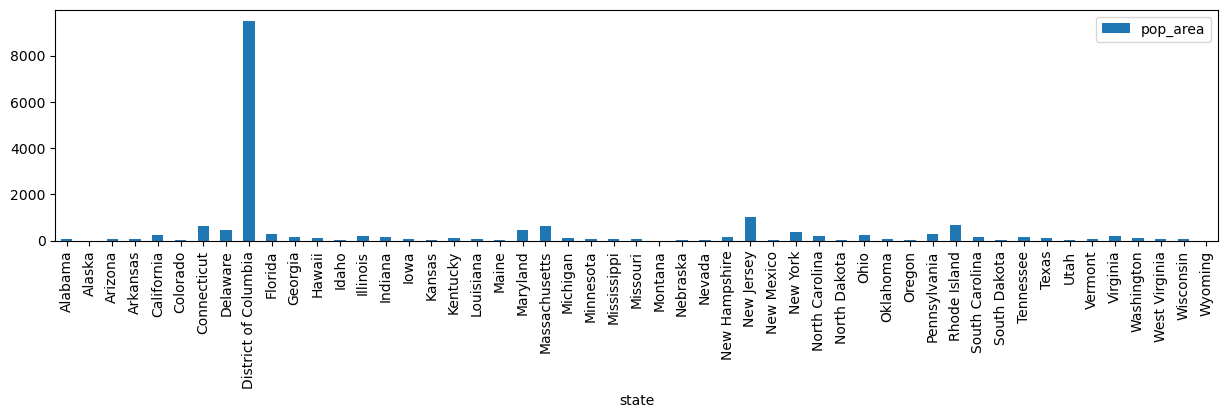

In [18]:
df.query("year==2013 & ages=='total'")[["state", "pop_area"]].set_index("state").plot.bar(figsize=(15,3))

# Pivot Tables

In [19]:
df.head()

,state_region,ages,year,population,state,area,pop_area
0,AL,under18,2012,1117489,Alabama,52423,21.316769
1,AL,total,2012,4817528,Alabama,52423,91.897221
2,AL,under18,2010,1130966,Alabama,52423,21.573851
3,AL,total,2010,4785570,Alabama,52423,91.287603
4,AL,under18,2011,1125763,Alabama,52423,21.474601


In [20]:
df.pivot_table(index="year", columns="state", values="pop_area").head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1990,48.643687,0.556645,20.569694,27.993673,115.877806,20.121316,364.775703,213.714176,5279.066176,121.826348,...,5.812645,72.541783,40.884016,13.888303,36.822361,90.457504,43.508604,46.001919,47.382799,3.014619
1991,49.214562,0.573084,21.125471,28.292994,118.248887,20.574717,366.991252,218.267656,5277.169118,124.817026,...,5.870113,73.552022,41.695299,14.233699,37.120385,91.765940,44.543364,46.070179,47.930614,3.046372
1992,49.852994,0.589263,21.802852,28.715101,120.380637,21.236868,367.782828,222.388178,5266.198529,127.520545,...,5.960977,74.849333,42.571589,14.637261,37.427665,93.477180,45.764112,46.212847,48.516503,3.085112
1993,50.548500,0.599173,22.628954,29.143103,121.863262,21.909414,369.762266,226.022006,5263.036765,130.335860,...,6.030361,76.194989,43.520893,15.083930,37.777067,94.862961,46.748089,46.426128,49.022358,3.120791
1994,51.097886,0.602313,23.529227,29.595173,123.007852,22.529203,371.334055,229.881781,5230.955882,133.362716,...,6.089347,77.616215,44.481566,15.513880,38.202288,96.119269,47.579225,46.418823,49.477032,3.159010


In [21]:
df["year_ranges"] = pd.cut(df["year"], bins=[0,2000,2010, 3000], labels=["<2000", "2000-2010", ">2010"])
df

,state_region,ages,year,population,state,area,pop_area,year_ranges
0,AL,under18,2012,1117489,Alabama,52423,21.316769,>2010
1,AL,total,2012,4817528,Alabama,52423,91.897221,>2010
2,AL,under18,2010,1130966,Alabama,52423,21.573851,2000-2010
3,AL,total,2010,4785570,Alabama,52423,91.287603,2000-2010
4,AL,under18,2011,1125763,Alabama,52423,21.474601,>2010
...,...,...,...,...,...,...,...,...
2443,WY,under18,1993,137458,Wyoming,97818,1.405242,<2000
2444,WY,total,1991,459260,Wyoming,97818,4.695046,<2000
2445,WY,under18,1991,136720,Wyoming,97818,1.397698,<2000
2446,WY,under18,1990,136078,Wyoming,97818,1.391135,<2000


In [22]:
df[df["ages"]=="total"].pivot_table(index="year_ranges", columns="state", values="pop_area")

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year_ranges,,,,,,,,,,,,,,,,,,,,,
<2000,81.609753,0.915923,38.692638,47.472268,194.827319,36.645772,601.708268,373.052712,8578.121658,221.322979,...,9.481205,126.044799,70.614992,23.580146,61.101489,155.790082,76.487400,74.794287,78.828094,4.899833
2000-2010,87.967654,1.021673,51.664566,52.681706,219.402749,45.231641,633.302597,435.115455,8490.776471,270.489693,...,10.145963,143.479787,86.284327,29.577043,64.563619,177.964103,88.891616,75.359312,84.849766,5.366138
>2010,91.899084,1.111482,57.443085,55.455524,232.124222,49.875841,647.955327,469.257421,9311.274510,293.789810,...,10.817183,153.033526,96.983876,33.647912,65.137910,191.360432,96.714982,76.570894,87.405931,5.883760


# Seaborn Titanic

In [23]:
import seaborn as sns

In [24]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
titanic["age_ranges"] = pd.cut(titanic["age"], bins=[0,18,50,100], labels=["<18","18-50",">50"])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_ranges
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,18-50
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,18-50
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,18-50
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,18-50
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,18-50


In [30]:
titanic.pivot_table(index="sex", columns="class", values="survived")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [31]:
titanic.pivot_table(index="sex", columns="class", values="survived", aggfunc="sum")

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [40]:
titanic.pivot_table(index="sex", columns="class", values="fare", aggfunc="mean")

class,First,Second,Third
sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [39]:
titanic.pivot_table(index="sex", columns="class", values="fare", aggfunc="mean", margins=True)

class,First,Second,Third,All
sex,,,,
female,106.125798,21.970121,16.118810,44.479818
male,67.226127,19.741782,12.661633,25.523893
All,84.154687,20.662183,13.675550,32.204208


In [ ]:
pd.cut(titanic["age"], bins=[0,18,50,100], labels=["<18","18-50",">50"])